# Diagnostic Visualization demo

In this demo, we want to demonstrate how to use the plotting utilities to visualize the posterior samples of Orbit MCMC models. 

We leveraged [arviz](https://arviz-devs.github.io/arviz/index.html) for the plots. ArviZ is a Python package for exploratory analysis of Bayesian models, includes functions for posterior analysis, data storage, model checking, comparison and diagnostics.

In [1]:
import pandas as pd
import numpy as np

import arviz as az

from orbit.models import LGT, DLT
from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_param_diagnostics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Load data

In [3]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [4]:
raw_df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [5]:
df=raw_df.copy()
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

## Fit a Model

In [6]:
DATE_COL="week"
RESPONSE_COL="claims"
REGRESSOR_COL=['trend.unemploy', 'trend.filling', 'trend.job']

In [7]:
dlt = DLT(response_col=RESPONSE_COL,
          date_col=DATE_COL,
          regressor_col=REGRESSOR_COL,
          seasonality=52,
          num_warmup=2000,
          num_sample=2000,
          chains=4)

In [8]:
dlt.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


## Posterior Diagnostic Viz

### trace plot

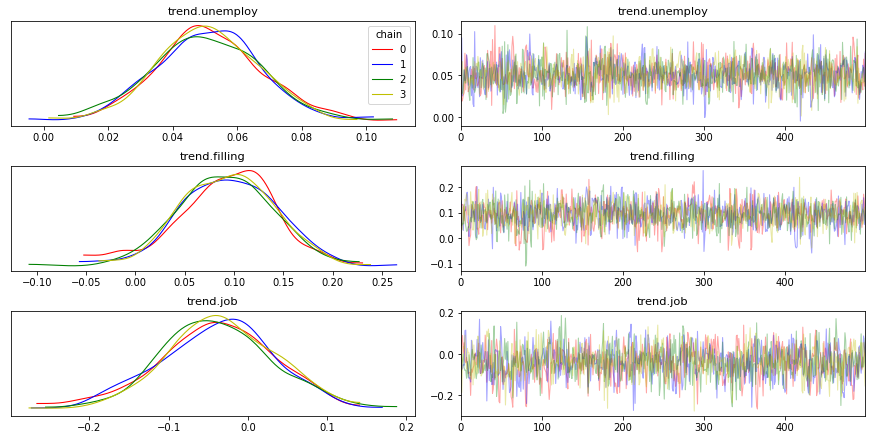

In [9]:
plot_param_diagnostics(dlt,
                       which='trace',
                       kind="trace", 
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

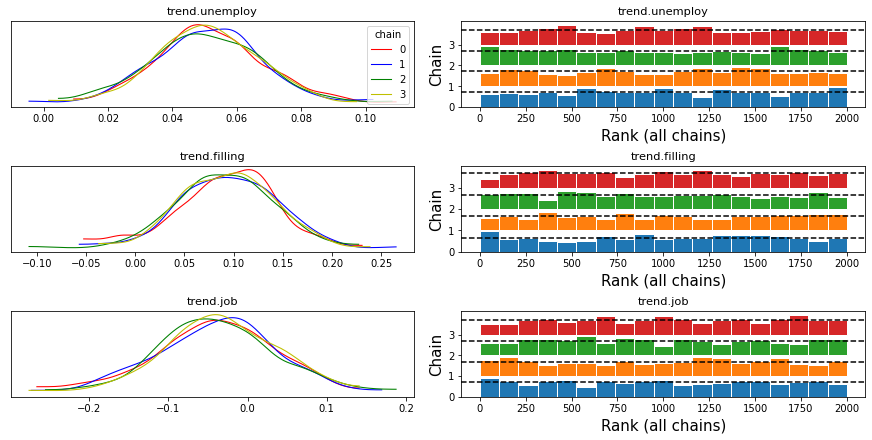

In [10]:
plot_param_diagnostics(dlt,
                       which='trace',
                       kind="rank_bars",
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

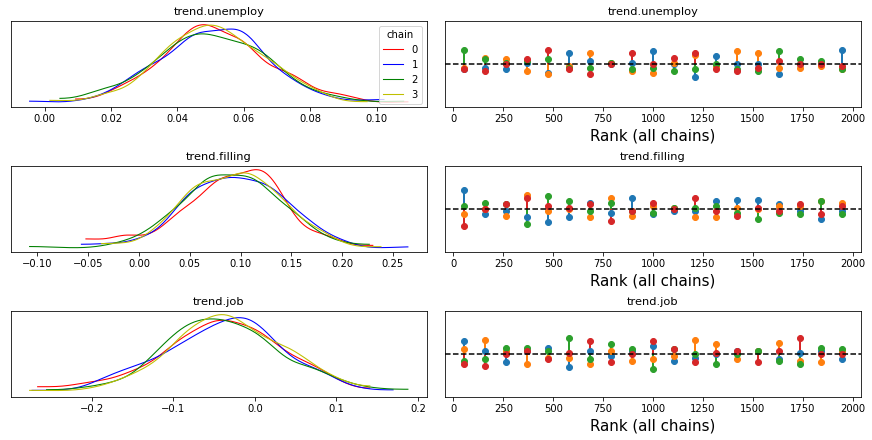

In [11]:
plot_param_diagnostics(dlt,
                       which='trace',
                       kind="rank_vlines",
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

### density plot

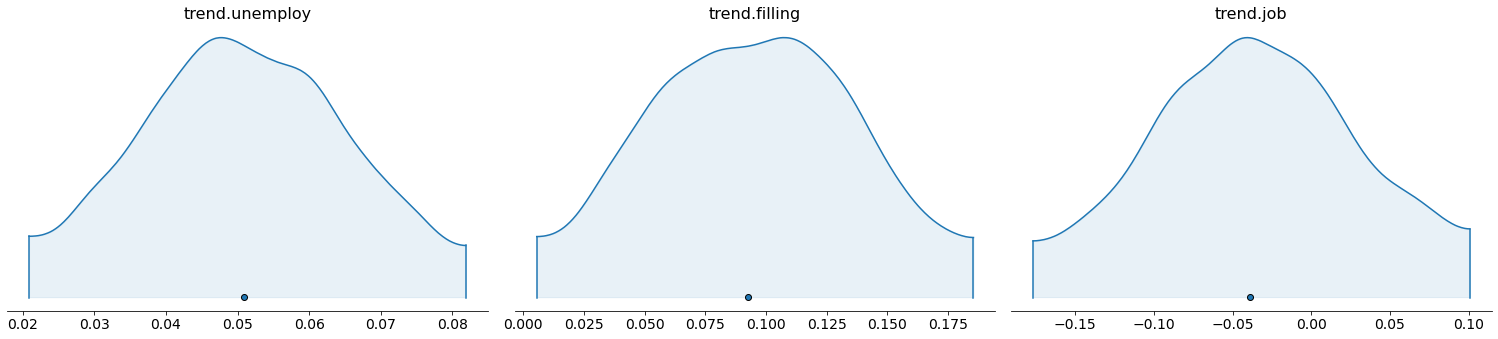

In [12]:
plot_param_diagnostics(dlt, which='density', shade=0.1);

### pair plot

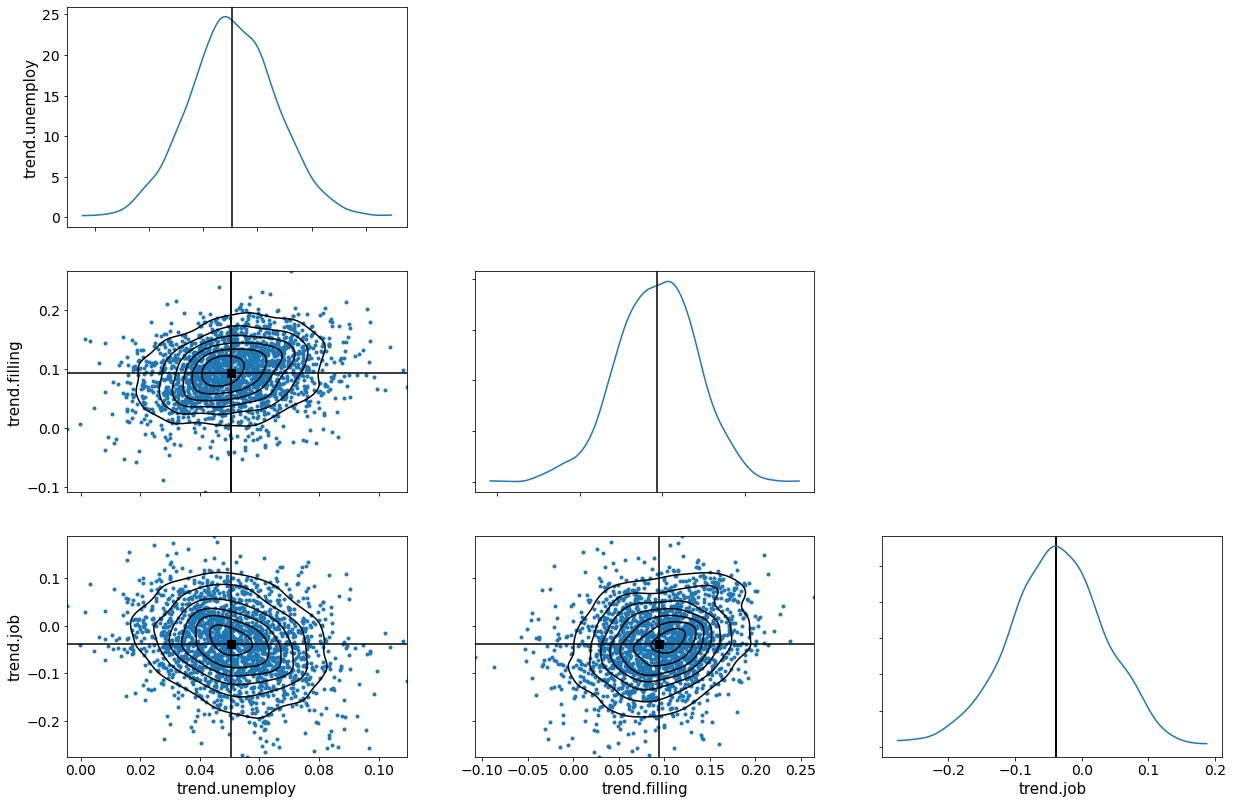

In [15]:
plot_param_diagnostics(dlt, 
                       which='pair',     
                        kind=["scatter", "kde"],
                       kde_kwargs={"fill_last": False},
                       marginals=True,
                       point_estimate="median");

### forest plot

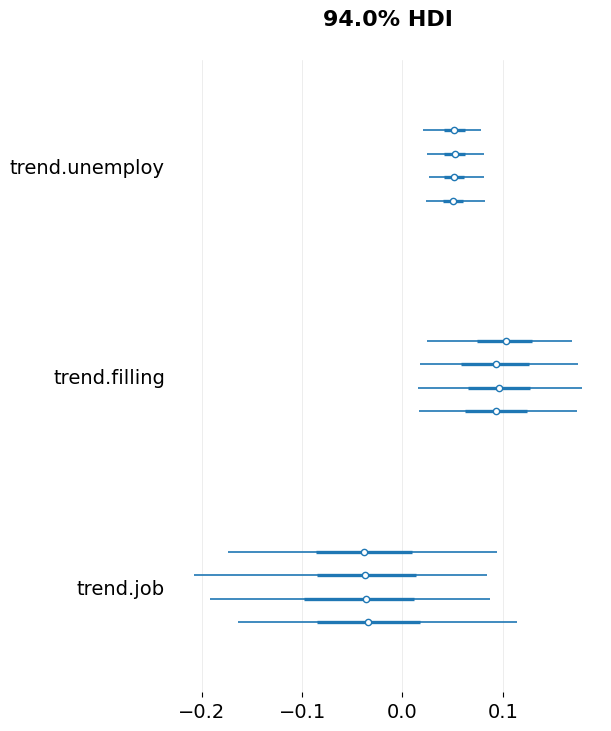

In [13]:
plot_param_diagnostics(dlt, which='forest');

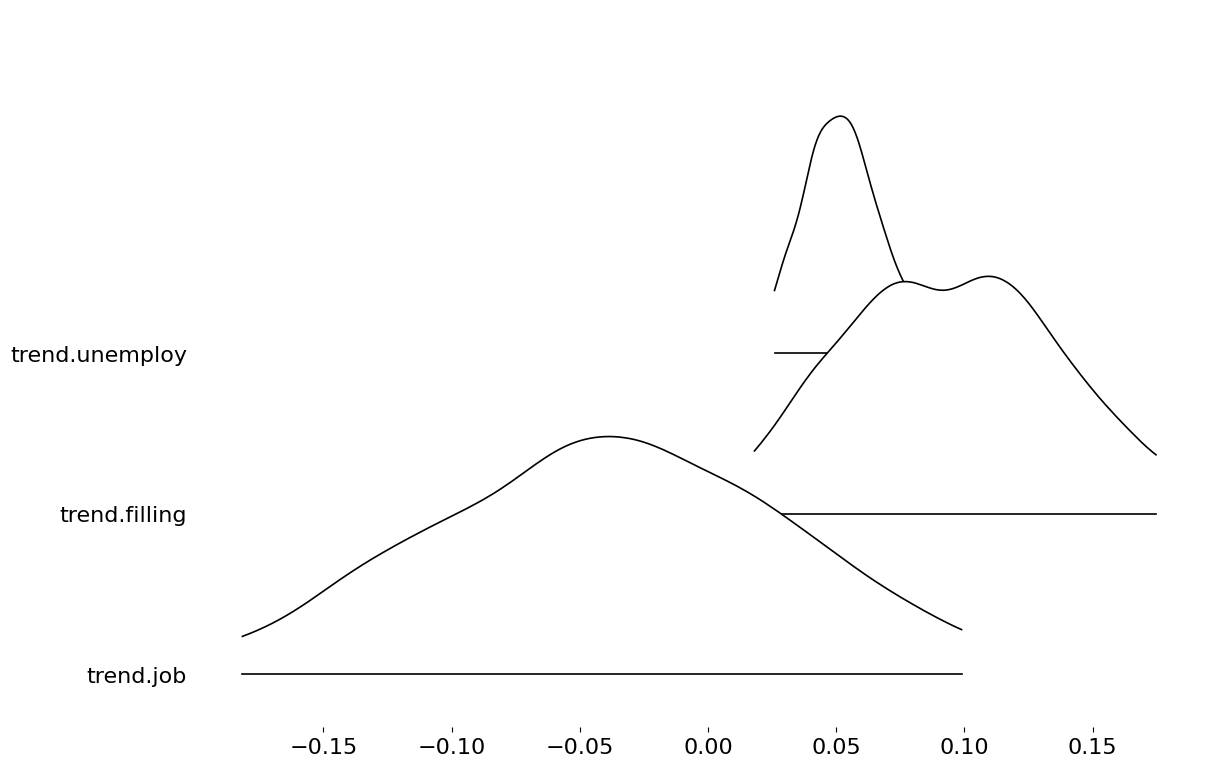

In [14]:
plot_param_diagnostics(dlt, which='forest', kind='ridgeplot', colors='white', combined=True);

### posterior plot

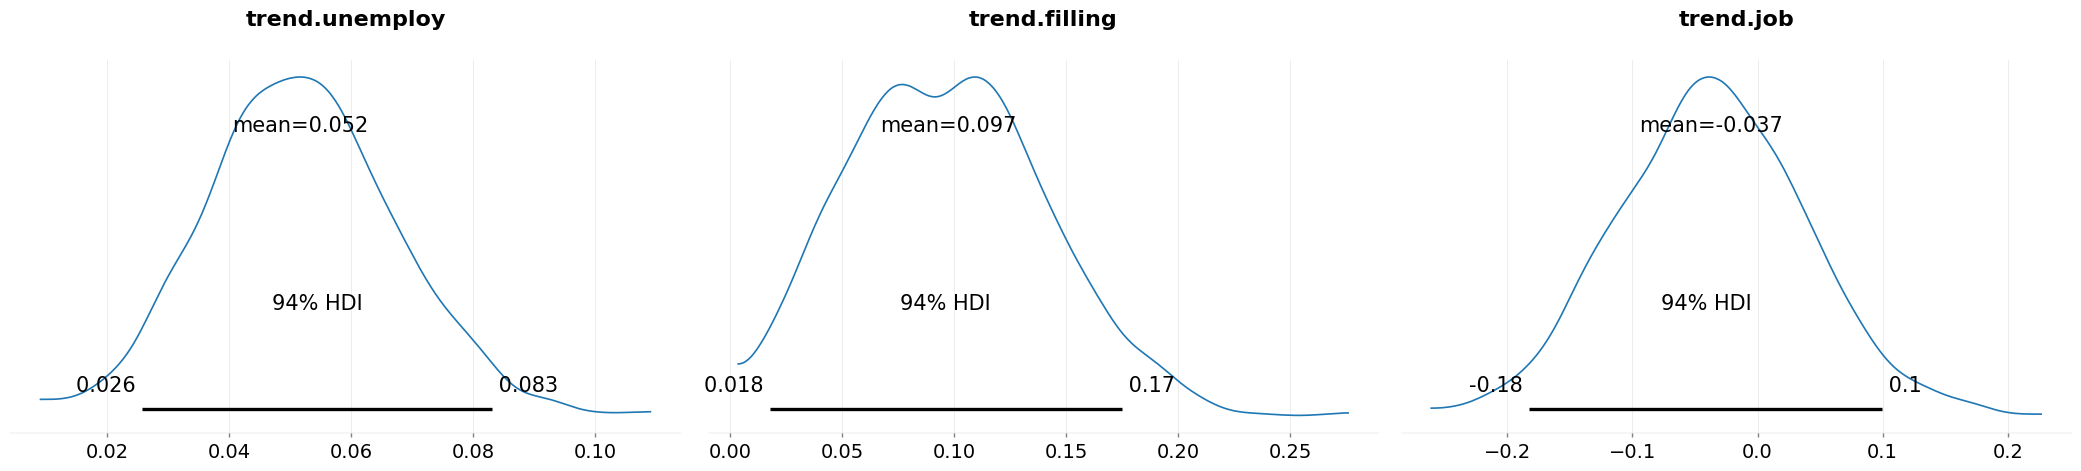

In [15]:
plot_param_diagnostics(dlt, which='posterior');

### autocorr plot

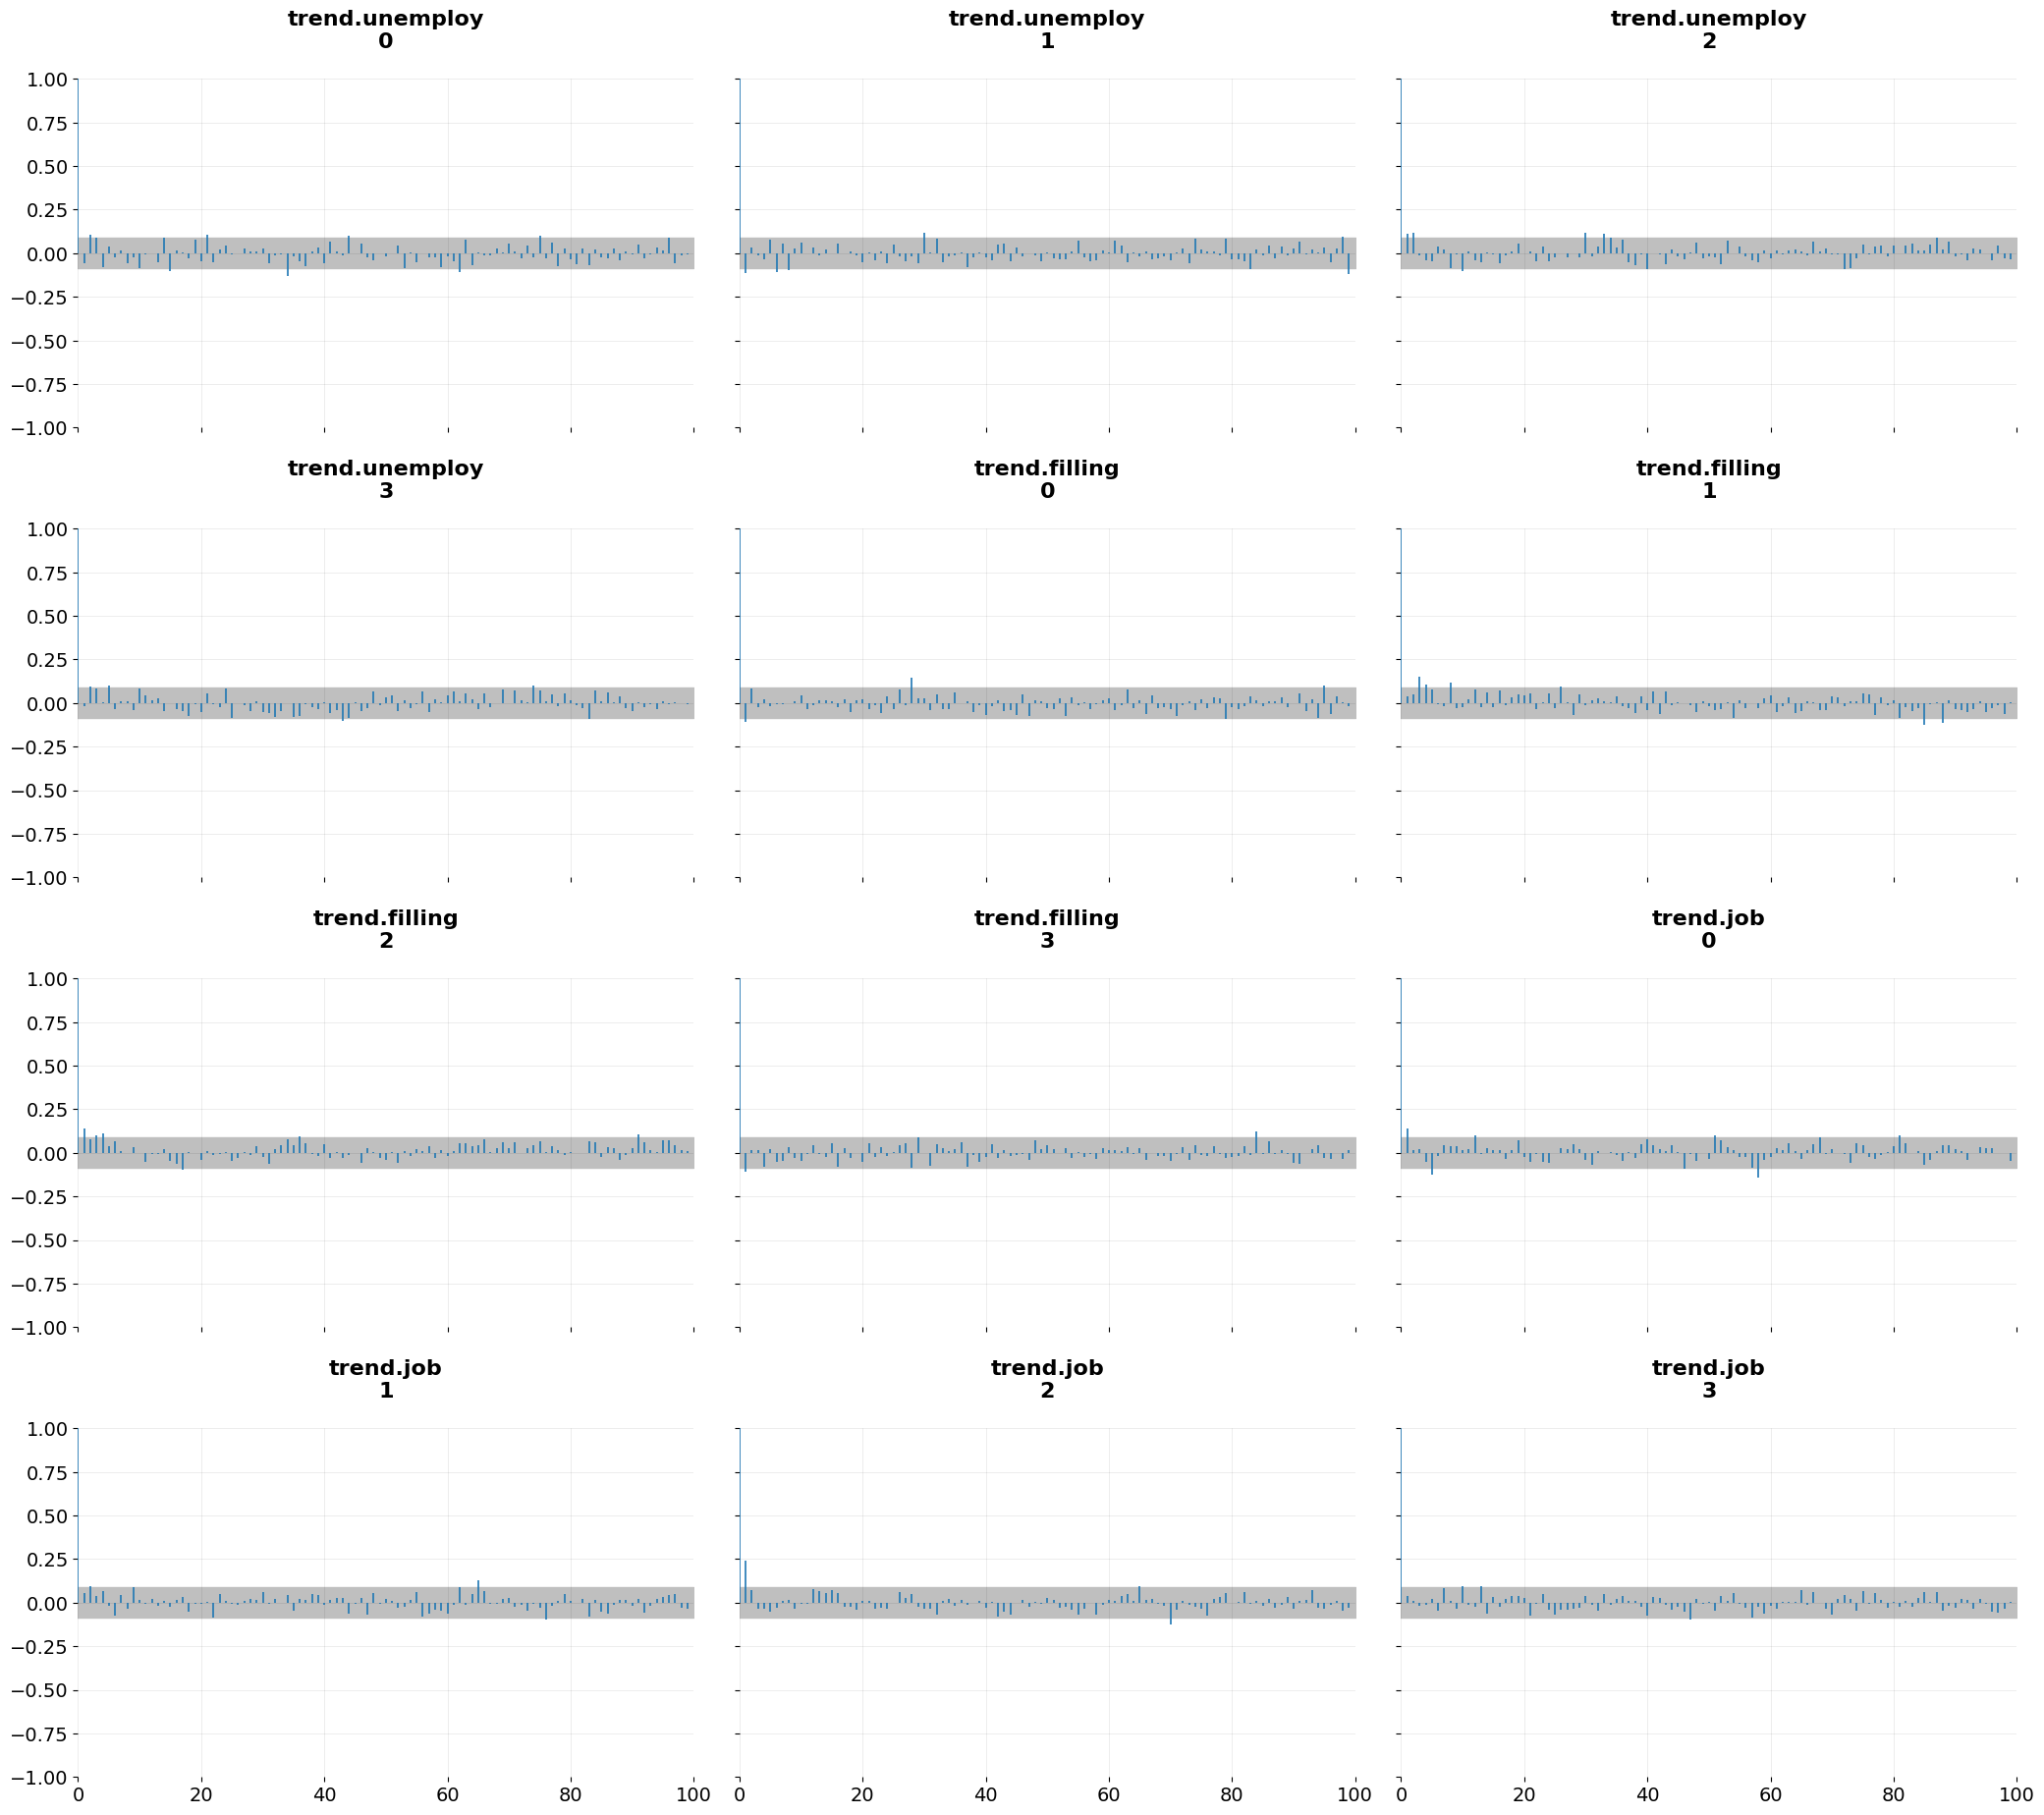

In [16]:
plot_param_diagnostics(dlt, which='autocorr');